#NAMA : FATHURRAHMAN NUR AZIZ
#NIM : 20.11.3694

#**PENUGASAN**
1. Berikan contoh dataset yang terdapat data pencilan/outlier, Visualisasikan dataset tesebut menggunakan (pilih salah satu)
a. Scatter Plot atau 
b. Box Plot 
2. Buang data pencilan tersebut
3. Visualisasikan lagi setelah data pencilan dibuang dan amati perbedaanya.

Dikumpulkan 1 minggu sejak hari ini dalam format file .ipynb berikut file dataset yang digunakan (.csv)

Penamaan file xxxx.ipynb
xxxx adalah 4 digit terakhir nim Anda

Penamaan file dataset xxxx.csv
xxxx adalah 4 digit terakhir nim Anda



Referensi :

https://ngodingdata.com/python-pandas-cara-menangani-missing-value/

https://ilmudatapy.com/20-function-di-pandas-python-yang-perlu-diketahui-pemula/


#JAWABAN TUGAS

##import dataset

In [1]:
#import library
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import dan preview dataset
url = "https://raw.githubusercontent.com/azizfath/bddm3/main/datasets/week3/insurance.csv"
df = pd.read_csv(url)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


##cek null, deskriptif statistik, dan pencilan

In [3]:
#cek null
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
#cek deskripsi statistik
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


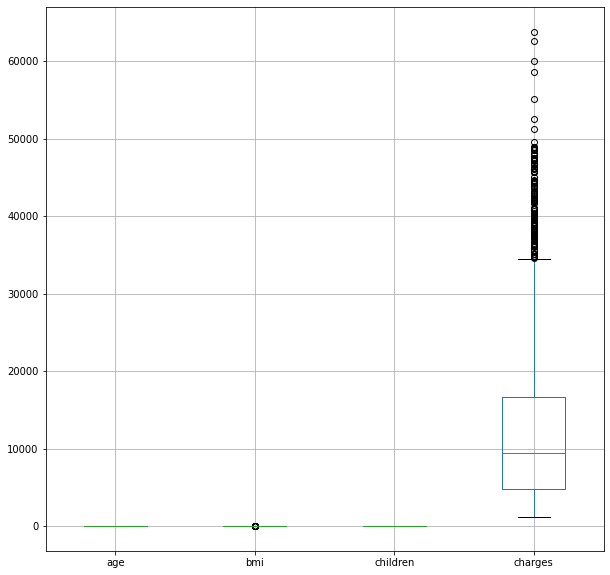

In [5]:
#mencari outlier dengan boxplot
plt.figure(figsize=(10,10))
df.boxplot()
plt.show()

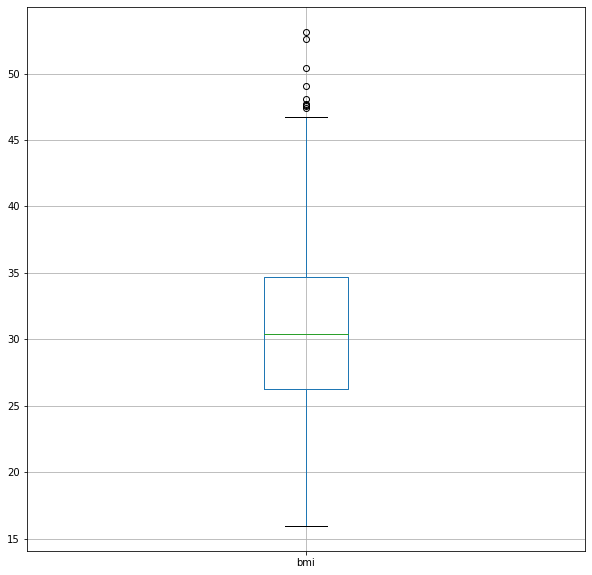

In [6]:
#ternyata terdapat pencilan di kolom bmi dan charges
#kita lihat lebih lanjut boxplot khusus kolom bmi
plt.figure(figsize=(10,10))
df.boxplot(['bmi'])
plt.show()

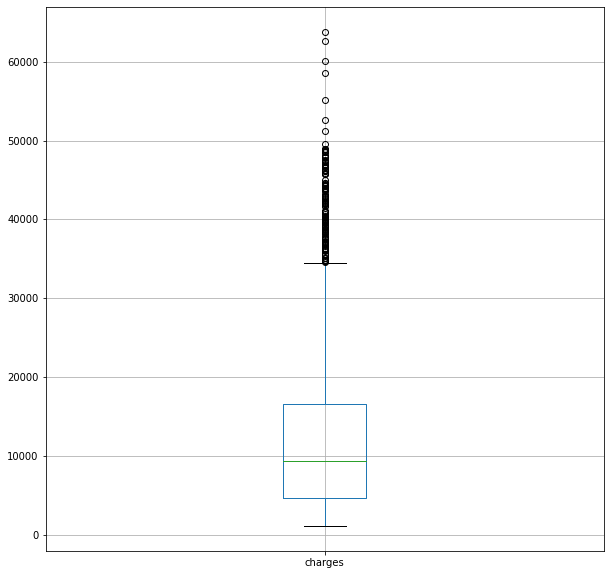

In [7]:
#kita lihat lebih lanjut boxplot khusus kolom charges
plt.figure(figsize=(10,10))
df.boxplot(['charges'])
plt.show()

##menghapus pencilan kolom BMI dengan percentil

dari boxplot diatas, kolom bmi terdapat outlier diatas batas atas

In [8]:
#percentil 5% batas atas kolom bmi
bmi_upper_limit = df['bmi'].quantile(0.95)
bmi_upper_limit

41.105999999999995

In [9]:
#menampilkan data upper limit bmi
df[df['bmi']>bmi_upper_limit]

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
83,48,female,41.230,4,no,northwest,11033.66170
116,58,male,49.060,0,no,southeast,11381.32540
170,63,male,41.470,0,no,southeast,13405.39030
185,36,male,41.895,3,yes,northeast,43753.33705
...,...,...,...,...,...,...,...
1239,25,female,42.130,1,no,southeast,3238.43570
1240,52,male,41.800,2,yes,southeast,47269.85400
1312,34,male,42.900,1,no,southwest,4536.25900
1317,18,male,53.130,0,no,southeast,1163.46270


In [10]:
#menghapus outlier bmi
bmi_without_outlier=df[df['bmi']<bmi_upper_limit]
bmi_without_outlier

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


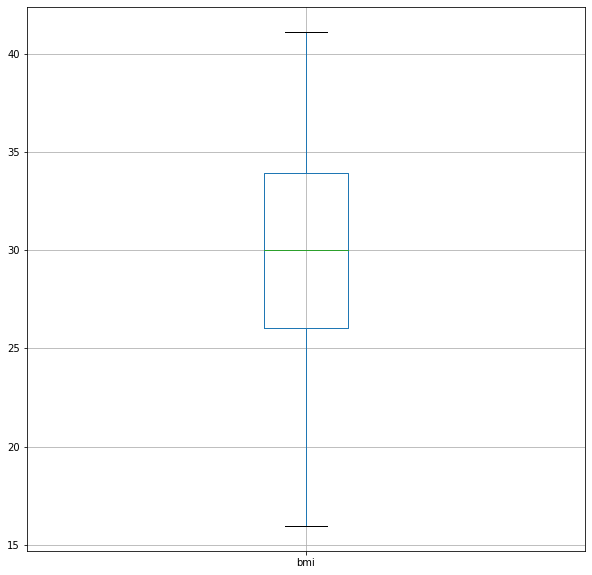

In [11]:
#menampilkan boxplot bmi tanpa outlier
plt.figure(figsize=(10,10))
bmi_without_outlier.boxplot(['bmi'])
plt.show()

##menghapus pencilan kolom Charges dengan percentil


dari boxplot diatas, kolom charges terdapat outlier diatas batas atas

In [12]:
#percentil 17% batas atas kolom charges
charges_upper_limit = df['charges'].quantile(0.83)
charges_upper_limit

23077.8702873

In [13]:
#menampilkan data upper limit charges
df[df['charges']>charges_upper_limit]

,age,sex,bmi,children,smoker,region,charges
9,60,female,25.840,0,no,northwest,28923.13692
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1308,25,female,30.200,0,yes,southwest,33900.65300
1313,19,female,34.700,2,yes,southwest,36397.57600
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [14]:
#menghapus outlier charges
charges_without_outlier=df[df['charges']<charges_upper_limit]
charges_without_outlier

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


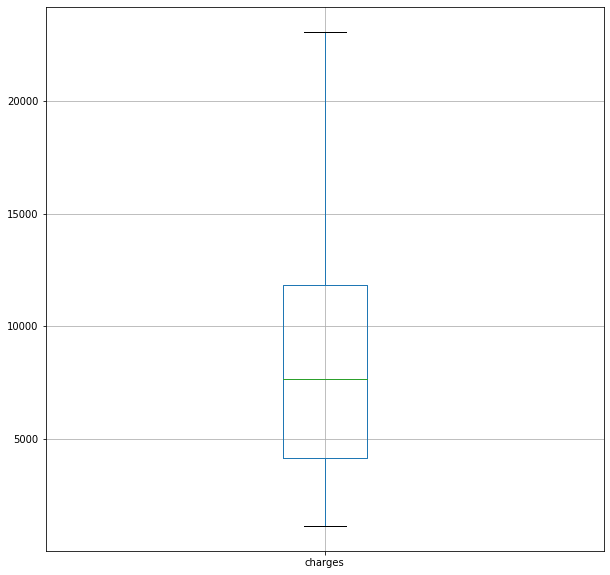

In [15]:
#menampilkan boxplot charges tanpa outlier
plt.figure(figsize=(10,10))
charges_without_outlier.boxplot(['charges'])
plt.show()

##menggabungkan dataframe bmi dan charges yang telah dibuang outliernya

In [16]:
#menggabungkan dua dataframe sebelumnya dengan metode right
# karena dataframe "charges" lebih sedikit kolomnya
isin_bmi=df['bmi'].isin(bmi_without_outlier['bmi'])
isin_charges=df['charges'].isin(charges_without_outlier['charges'])
df_merge=df[isin_bmi]
df_merge=df_merge[isin_charges]
df_merge

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1331,23,female,33.400,0,no,southwest,10795.93733
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [17]:
#cek null
df_merge.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [18]:
#cek deskriptif statistik
df_merge.describe()

,age,bmi,children,charges
count,1061.000000,1061.000000,1061.00000,1061.000000
mean,38.371348,29.538417,1.06409,8540.446063
std,13.916655,5.410949,1.21144,5381.305908
min,18.000000,15.960000,0.00000,1121.873900
25%,26.000000,25.700000,0.00000,4076.497000
50%,38.000000,29.545000,1.00000,7682.670000
75%,50.000000,33.400000,2.00000,11881.969600
max,64.000000,41.100000,5.00000,23065.420700


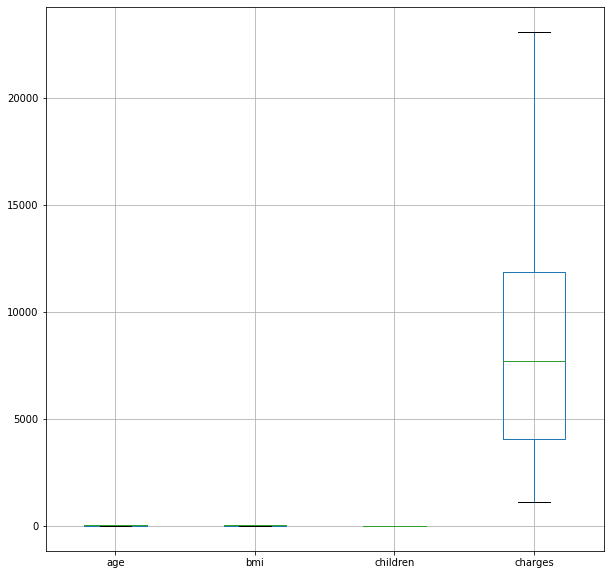

In [19]:
#visualisasikan dengan boxplot
plt.figure(figsize=(10,10))
df_merge.boxplot()
plt.show()

####SELESAI, PENCILAN BERHASIL DIHILANGKAN
####Jumlah Row berubah dari awalnya 1338 menjadi 1061